**Seleção de Variáveis:**

* Chi Quadrado
* RFE
* Random Forest
* Variance Threshold

**Análise utilizando os seguintes algorótimos:**

* Regressão Logística
* Random Forest
* GB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('AtrasoCartaoCredito.csv')

In [3]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333


In [4]:
df.shape

(891, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
ID                     891 non-null int64
Target                 891 non-null int64
GrupoEconomico         891 non-null int64
Sexo                   891 non-null object
Idade                  891 non-null int64
GrupoRisco             891 non-null int64
ValorCompraAnual       863 non-null float64
GastoMax               891 non-null float64
GastoMedio             891 non-null float64
UF                     891 non-null object
CidadeResidencia       891 non-null object
RegiaodoPais           891 non-null object
NumeroComprasOnline    891 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 90.6+ KB


In [6]:
df.isnull().sum()

ID                      0
Target                  0
GrupoEconomico          0
Sexo                    0
Idade                   0
GrupoRisco              0
ValorCompraAnual       28
GastoMax                0
GastoMedio              0
UF                      0
CidadeResidencia        0
RegiaodoPais            0
NumeroComprasOnline     0
dtype: int64

In [7]:
df.fillna(df.ValorCompraAnual.mean(), inplace=True)

In [8]:
df.drop(columns=['ID'], inplace=True)

In [9]:
df.describe()

,Target,GrupoEconomico,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,30.402918,0.523008,1.138834e+05,8278.971380,9658.799944,4.879393e+04
std,0.486592,0.836071,12.579024,1.102743,3.913635e+05,28684.456627,33465.199399,1.154341e+06
min,0.000000,1.000000,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000,2.000000,22.000000,0.000000,1.780000e+02,11.500000,13.416667,1.096117e+00
50%,0.000000,3.000000,26.000000,0.000000,2.655000e+03,172.500000,201.250000,1.321429e+01
75%,1.000000,3.000000,36.000000,1.000000,7.895800e+04,5628.000000,6566.000000,5.728338e+02
max,1.000000,3.000000,92.000000,8.000000,5.123292e+06,365949.428571,426941.000000,3.410762e+07


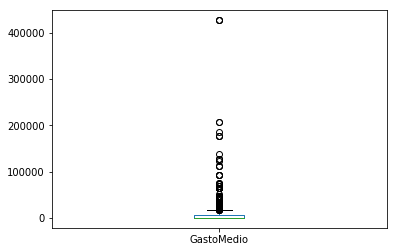

In [10]:
df.GastoMedio.plot(kind='box')

In [11]:
df[df.GastoMedio > 400000]

,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
258,1,1,mulher,35,0,5123292.0,365949.428571,426941.0,BA,América Dourada,Região Nordeste,24396.628571
679,1,1,homem,36,0,5123292.0,365949.428571,426941.0,ES,Bom Jesus do Norte,Região Sudeste,23718.944444
737,1,1,homem,35,0,5123292.0,365949.428571,426941.0,MT,Alto Paraguai,Região Centro-Oeste,24396.628571


O número de compras também é bastante elevado

In [12]:
df = pd.get_dummies(df, columns=['GrupoEconomico', 'Sexo', 'GrupoRisco', 'RegiaodoPais'], drop_first=True)

In [13]:
df.head(1)

,Target,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,GrupoEconomico_2,GrupoEconomico_3,...,GrupoRisco_1,GrupoRisco_2,GrupoRisco_3,GrupoRisco_4,GrupoRisco_5,GrupoRisco_8,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,0,22,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,54.924242,0,1,...,1,0,0,0,0,0,0,0,1,0


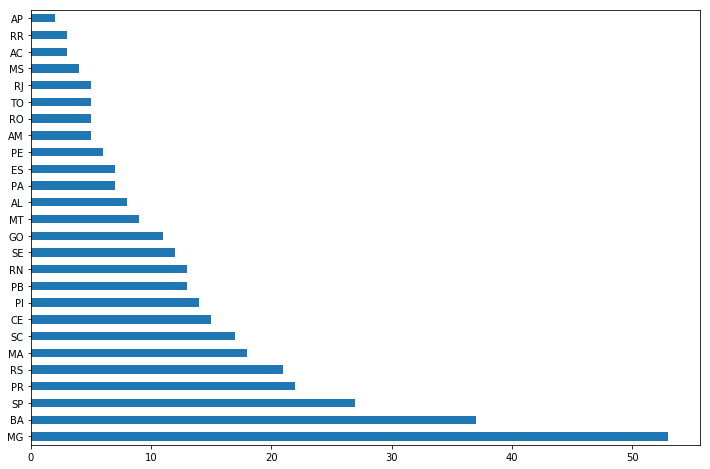

In [14]:
plt.figure(figsize=(12,8))
df[df.Target == 1].UF.value_counts().plot(kind='barh')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()
label_l = label.fit_transform(df.UF)
df.UF = pd.DataFrame(label_l, columns=['LE_UF'])

label_2 = label.fit_transform(df.CidadeResidencia)
df.CidadeResidencia = pd.DataFrame(label_2, columns=['LE_CidadeResidencia'])

In [17]:
df.head()

,Target,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,GrupoEconomico_2,GrupoEconomico_3,...,GrupoRisco_1,GrupoRisco_2,GrupoRisco_3,GrupoRisco_4,GrupoRisco_5,GrupoRisco_8,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,0,22,7250.0,517.857143,604.166667,9,485,54.924242,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,38,71283.0,5091.642857,5940.250000,18,452,312.644737,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,26,7925.0,566.071429,660.416667,16,8,50.801282,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,35,531.0,37.928571,44.250000,16,222,2.528571,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,35,805.0,57.500000,67.083333,4,486,3.833333,0,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
X = df.drop(columns=['Target'])
y = df.Target

# Seleção de Variáveis

### Chi Quadrado

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [20]:
x_norm = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(chi2)
chi2_selector.fit(x_norm, y)

chi2_s = chi2_selector.get_support()

chi_feature = X.loc[:,chi2_s].columns.tolist()
print(str(len(chi_feature)), 'variáveis selecionadas:')
print(str(chi_feature))

10 variáveis selecionadas:
['ValorCompraAnual', 'GastoMax', 'GastoMedio', 'GrupoEconomico_2', 'GrupoEconomico_3', 'Sexo_mulher', 'GrupoRisco_1', 'GrupoRisco_4', 'GrupoRisco_5', 'GrupoRisco_8']


### RFE

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [22]:
rfe_selector = RFE(estimator=LogisticRegression(), step=10)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), 'variáveis selecionadas:')
print(str(rfe_feature))

10 variáveis selecionadas:
['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'GrupoEconomico_3', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Sudeste']


### Random Forest

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [24]:
em_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
em_selector.fit(X, y)

em_support = em_selector.get_support()
em_feature = X.loc[:, em_support].columns.tolist()

print(str(len(em_feature)), 'variáveis selecionadas:')
print(str(em_feature))

9 variáveis selecionadas:
['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'NumeroComprasOnline', 'GrupoEconomico_3', 'Sexo_mulher']


### Variance Threshold

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
vt_selector = VarianceThreshold(threshold=5)
vt_selector.fit_transform(X)

vt_support = vt_selector.get_support()
vt_feature = X.loc[:, vt_support].columns.tolist()

print(str(len(vt_feature)), 'variáveis selecionadas:')
print(str(vt_feature))

7 variáveis selecionadas:
['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'NumeroComprasOnline']


In [27]:
feature_selection_df = pd.DataFrame({'Variáveis': X.columns,
                                 'chi2': chi2_s,
                                 'RFE': rfe_support,
                                 'Random Forest': em_support,
                                 'Variance Threshold': vt_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total', 'Variáveis'], ascending=False)
feature_selection_df.head(10)

,Variáveis,chi2,RFE,Random Forest,Variance Threshold,Total
1,ValorCompraAnual,True,True,True,True,4
3,GastoMedio,True,True,True,True,4
2,GastoMax,True,True,True,True,4
4,UF,False,True,True,True,3
9,Sexo_mulher,True,True,True,False,3
0,Idade,False,True,True,True,3
8,GrupoEconomico_3,True,True,True,False,3
5,CidadeResidencia,False,True,True,True,3
6,NumeroComprasOnline,False,False,True,True,2
18,RegiaodoPais_Região Sudeste,False,True,False,False,1


In [28]:
my_features = feature_selection_df[(feature_selection_df.Total == 4) | (feature_selection_df.Total == 3)]['Variáveis'].to_list()
len(my_features)

8

In [29]:
print(my_features)

['ValorCompraAnual', 'GastoMedio', 'GastoMax', 'UF', 'Sexo_mulher', 'Idade', 'GrupoEconomico_3', 'CidadeResidencia']


In [30]:
expl = df[['ValorCompraAnual', 'GastoMedio', 'GastoMax', 'UF', 'Sexo_mulher', 'Idade', 'GrupoEconomico_3', 'CidadeResidencia']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(expl, y, test_size=0.3, random_state=123)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

# Análise

## GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

### Regressão Logística

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
rl = LogisticRegression()

In [37]:
param_grid_rl = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [38]:
grid_rl = GridSearchCV(estimator=rl, param_grid=param_grid_rl, scoring='accuracy', cv=5)

grid_rl.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
grid_rl.best_params_

{'C': 0.09, 'penalty': 'l1'}

### RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators=400, random_state=123)

In [42]:
param_grid = {'n_estimators': [10, 20, 50, 100, 200, 500],
             'criterion': ['gini', 'entropy'],
             'bootstrap': [True, False]}

In [43]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
grid.best_params_

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 200}

### GradientBoostingClassifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
parm_gbc = {
    'min_samples_split': [0.1, 0.5, 1.0, 3, 5],
    'min_samples_leaf': [0.1, 0.5],
    'max_depth': [2,3,5,10],
    'n_estimators':[2,5,10,15]}

In [47]:
grid_gb = GridSearchCV(GradientBoostingClassifier(),
                      parm_gbc,
                      scoring='accuracy',
                      cv=5, # cross validation
                      n_jobs=-1) # serve para paralelizar o máximo de jobs possível

In [48]:
grid_gb.fit(X_train, y_train)

C:\Users\RobertoMegumi\Anaconda33\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [0.1, 0.5, 1.0, 3, 5], 'min_samples_leaf': [0.1, 0.5], 'max_depth': [2, 3, 5, 10], 'n_estimators': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
grid_gb.best_params_

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.5,
 'n_estimators': 5}

## Resultados

In [50]:
# Regressão Logística
y_pred_rl_test = grid_rl.predict(X_test)
y_pred_rl_train = grid_rl.predict(X_train)

In [51]:
# Random Forest
y_pred_rf_test = grid.predict(X_test)
y_pred_rf_train = grid.predict(X_train)

In [52]:
# Gradient Boost
y_pred_gb_test = grid_gb.predict(X_test)
y_pred_gb_train = grid_gb.predict(X_train)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
# Regressão Logística
print(classification_report(y_pred_rl_test, y_test))
print(confusion_matrix(y_pred_rl_test, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       175
           1       0.68      0.72      0.70        93

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

[[144  31]
 [ 26  67]]


In [55]:
# Random Forest
print(classification_report(y_pred_rf_test, y_test))
print(confusion_matrix(y_pred_rf_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       177
           1       0.70      0.76      0.73        91

   micro avg       0.81      0.81      0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268

[[148  29]
 [ 22  69]]


In [56]:
# Gradient Boost
print(classification_report(y_pred_gb_test, y_test))
print(confusion_matrix(y_pred_gb_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       176
           1       0.69      0.74      0.72        92

   micro avg       0.80      0.80      0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

[[146  30]
 [ 24  68]]


* The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The recall is intuitively the ability of the classifier to find all the positive samples.
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
* The support is the number of occurrences of each class in y_true